In [2]:
from netCDF4 import Dataset
import numpy as np
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble


In [3]:
airTemp = 'D:/1study/VegeSimulation/for_students/for_students/global-longrun_jedi-dvgm_inputs_outputs/tas.nc'
netLongRadiantionFlux = 'D:/1study/VegeSimulation/for_students/for_students/global-longrun_jedi-dvgm_inputs_outputs/rlns.nc'
shortwaveRadiation = 'D:/1study/VegeSimulation/for_students/for_students/global-longrun_jedi-dvgm_inputs_outputs/rsds.nc'
precipitation = 'D:/1study/VegeSimulation/for_students/for_students/global-longrun_jedi-dvgm_inputs_outputs/pr.nc'
output = 'D:/1study/VegeSimulation/for_students/for_students/global-longrun_jedi-dvgm_inputs_outputs/jedi_output.nc'

landSeaMask = 'D:/1study/VegeSimulation/for_students/for_students/global-longrun_jedi-dvgm_inputs_outputs/landsea.nc'
lantitude =  'D:/1study/VegeSimulation/for_students/for_students/global-longrun_jedi-dvgm_inputs_outputs/latitude.nc'
longitude = 'D:/1study/VegeSimulation/for_students/for_students/global-longrun_jedi-dvgm_inputs_outputs/longitude.nc'
elevation = 'D:/1study/VegeSimulation/for_students/for_students/global-longrun_jedi-dvgm_inputs_outputs/elevation.nc'
moisture = 'D:/1study/VegeSimulation/for_students/for_students/global-longrun_jedi-dvgm_inputs_outputs/paw.nc'
spatialMetaData = 'D:/1study/VegeSimulation/for_students/for_students/global-longrun_jedi-dvgm_inputs_outputs/globe_surf.nc'

airTempDataset = Dataset(airTemp)
netLongRadiantionFluxDataSet = Dataset(netLongRadiantionFlux)
shortwaveRadiationDataset = Dataset(shortwaveRadiation)
precipitationDataSet = Dataset(precipitation)
outputDataset = Dataset(output)

landSeaMaskDataset = Dataset(landSeaMask)
lantitudeDataset = Dataset(lantitude)
longitudeDataset = Dataset(longitude)
elevationDataset = Dataset(elevation)
moistureDataset = Dataset(moisture)
spatialMetaDataset = Dataset(spatialMetaData)

airTempArray = airTempDataset['tas'][:].squeeze()
netLongRadiantionFluxArray = netLongRadiantionFluxDataSet['rlns'][:].squeeze()
shortwaveRadiationArray = shortwaveRadiationDataset['rsds'][:].squeeze()
precipitationArray = precipitationDataSet['pr'][:].squeeze()
NPPArray = outputDataset['NPP'][:].squeeze()
landSeaMaskArray = landSeaMaskDataset['var1'][:].squeeze()
lantitudeArray = lantitudeDataset['lat'][:].squeeze()
longitudeArray = longitudeDataset['lon'][:].squeeze()
elevationArray = elevationDataset['data'][:].squeeze()
moistureArray = moistureDataset['paw'][:].squeeze()
spatialMetaDataArray = spatialMetaData[:]



In [4]:
print('airTempArray'+str(np.shape(airTempArray)))
print('netLongRadiantionFluxArray'+str(np.shape(netLongRadiantionFluxArray)))
print('shortwaveRadiationArray'+str(np.shape(shortwaveRadiationArray)))
print('precipitationArray'+str(np.shape(precipitationArray)))
print('NPPArray'+str(np.shape(NPPArray)))
print('landSeaMaskArray'+str(np.shape(landSeaMaskArray)))
print('lantitudeArray'+str(np.shape(lantitudeArray)))
print('longitudeArray'+str(np.shape(longitudeArray)))
print('elevationArray'+str(np.shape(elevationArray)))
print('moistureArray'+str(np.shape(moistureArray)))
print('spatialMetaDataArray'+str(np.shape(spatialMetaDataArray)))

airTempArray(3516, 145, 192)
netLongRadiantionFluxArray(3516, 145, 192)
shortwaveRadiationArray(3516, 145, 192)
precipitationArray(3516, 145, 192)
NPPArray(3516, 145, 192)
landSeaMaskArray(145, 192)
lantitudeArray(145,)
longitudeArray(192,)
elevationArray(145, 192)
moistureArray(145, 192)
spatialMetaDataArray()


In [5]:
newlantitudeArray = [[0] * 192 for i in range(145)]
for i in range(145):
    for j in range(192):
        newlantitudeArray[i][j] = lantitudeArray[i]

newlongitudeArray = [[] for i in range(145)]
for i in range(145):
    newlongitudeArray[i] = longitudeArray

newlantitudeArray = np.array(newlantitudeArray)
newlongitudeArray = np.array(newlongitudeArray)

In [6]:
####process static data 
import pandas as pd
landSeaMaskArray_flatten = landSeaMaskArray.reshape(145*192)
lantitudeArray_flatten = newlantitudeArray.reshape(145*192)
longitudeArray_flatten = newlongitudeArray.reshape(145*192)
elevationArray_flatten = elevationArray.reshape(145*192)
moistureArray_flatten = moistureArray.reshape(145*192)
geo_attri_multi = np.array(list(zip(landSeaMaskArray_flatten,lantitudeArray_flatten,longitudeArray_flatten,elevationArray_flatten,moistureArray_flatten))).repeat(repeats=5,axis=0)
geo_attri = np.array(list(zip(landSeaMaskArray_flatten,lantitudeArray_flatten,longitudeArray_flatten,elevationArray_flatten,moistureArray_flatten)))
static_data = pd.DataFrame(geo_attri_multi)
static_data_non_multi = pd.DataFrame(geo_attri)
static_data = static_data.rename(columns={0: 'landSea', 1: 'lantitude', 2: 'longitude', 3: 'elevation', 4: 'moisture'})
static_data_non_multi= static_data_non_multi.rename(columns={0: 'landSea', 1: 'lantitude', 2: 'longitude', 3: 'elevation', 4: 'moisture'})


In [7]:
pd.DataFrame(np.array(list(zip(landSeaMaskArray_flatten,lantitudeArray_flatten,longitudeArray_flatten,elevationArray_flatten,moistureArray_flatten))))

,0,1,2,3,4
0,0.0,90.0,0.000,-4226.0,0.105
1,0.0,90.0,1.875,-4226.0,0.105
2,0.0,90.0,3.750,-4226.0,0.105
3,0.0,90.0,5.625,-4226.0,0.105
4,0.0,90.0,7.500,-4226.0,0.105
...,...,...,...,...,...
27835,0.0,-90.0,350.625,2833.0,0.105
27836,0.0,-90.0,352.500,2833.0,0.105
27837,0.0,-90.0,354.375,2833.0,0.105
27838,0.0,-90.0,356.250,2833.0,0.105


In [8]:
static_data_non_multi

,landSea,lantitude,longitude,elevation,moisture
0,0.0,90.0,0.000,-4226.0,0.105
1,0.0,90.0,1.875,-4226.0,0.105
2,0.0,90.0,3.750,-4226.0,0.105
3,0.0,90.0,5.625,-4226.0,0.105
4,0.0,90.0,7.500,-4226.0,0.105
...,...,...,...,...,...
27835,0.0,-90.0,350.625,2833.0,0.105
27836,0.0,-90.0,352.500,2833.0,0.105
27837,0.0,-90.0,354.375,2833.0,0.105
27838,0.0,-90.0,356.250,2833.0,0.105


In [9]:
###对于static的feature，求288个月的NPP均值
#NPPArray[0] = 145
#NPPArray[0][0] = 192
#NPPArray = 3516
ave = []
for i in range(0, len(NPPArray[0])):
    for j in range(0, len(NPPArray[0][0])):
        temp = 0
        for k in range(0, len(NPPArray)):
            temp += NPPArray[k][i][j]
        ave.append(temp/len(NPPArray))
#print(ave)
#print(len(ave))

In [10]:
count = 0
for i in range(len(ave)):
    if ave[i] == 0:
        count += 1
print(count)

19747


In [11]:
static_data_non_multi['NPP'] = ave

In [12]:
static_data_non_multi

,landSea,lantitude,longitude,elevation,moisture,NPP
0,0.0,90.0,0.000,-4226.0,0.105,0.0
1,0.0,90.0,1.875,-4226.0,0.105,0.0
2,0.0,90.0,3.750,-4226.0,0.105,0.0
3,0.0,90.0,5.625,-4226.0,0.105,0.0
4,0.0,90.0,7.500,-4226.0,0.105,0.0
...,...,...,...,...,...,...
27835,0.0,-90.0,350.625,2833.0,0.105,0.0
27836,0.0,-90.0,352.500,2833.0,0.105,0.0
27837,0.0,-90.0,354.375,2833.0,0.105,0.0
27838,0.0,-90.0,356.250,2833.0,0.105,0.0


In [13]:
### delete rows which is "nan"
label = []
for i in range(len(ave)):
    if not static_data_non_multi.iloc[i,5]:
        label.append(i)
for i in range(len(label)):
    static_data_non_multi = static_data_non_multi.drop(label[i])
print(len(label))

19747


In [14]:
###split train set and test set
x_train_static, x_test_static, y_train_static, y_test_static = train_test_split(static_data_non_multi[['landSea', 'lantitude', 'longitude', 'elevation', 'moisture']], 
                                                    static_data_non_multi['NPP'], random_state=100, train_size=0.8)

Best tree number: 130


Text(0, 0.5, 'model accuracy')

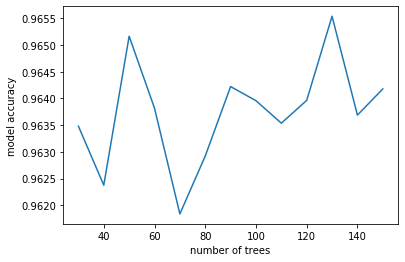

In [15]:
# RandomForest：select best tree number which has highest accuracy (static data only)
rf_value = []
best_tree_number = 0
max_v = 0
for i in range(30,160,10):
    model_randomforest = ensemble.RandomForestRegressor(n_estimators=i)
    model_randomforest.fit(x_train_static, y_train_static)
    predict_score = model_randomforest.score(x_test_static, y_test_static)
    if predict_score > max_v:
        max_v = predict_score 
        best_tree_number = i
    rf_value.append(predict_score)
tree_number = [i for i in range(30,160,10)]
print("Best tree number:", best_tree_number)
plt.plot(tree_number,rf_value)
plt.xlabel("number of trees")
plt.ylabel("model accuracy")

<Figure size 432x288 with 0 Axes>

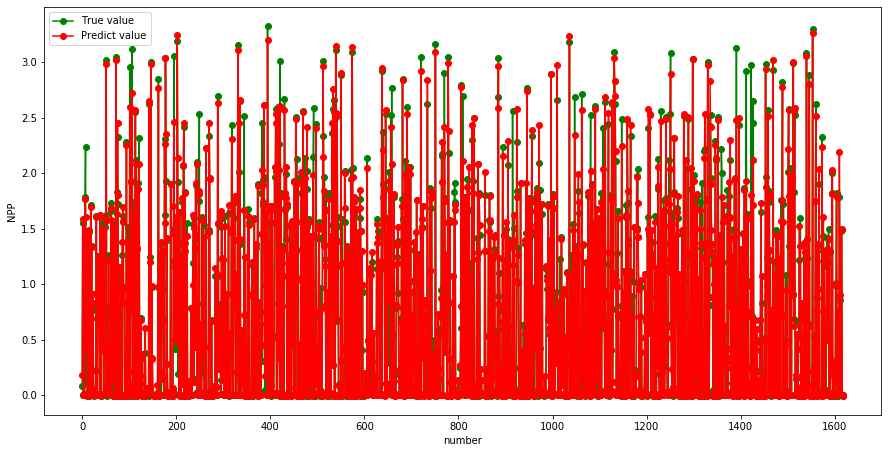

In [16]:
# plot using best tree number for predicting (static data only)
model_randomforest = ensemble.RandomForestRegressor(n_estimators=best_tree_number)
model_randomforest.fit(x_train_static, y_train_static)
y_pred = model_randomforest.predict(x_test_static)
plt.figure()
plt.figure(figsize=(15, 7.5))
plt.plot(np.arange(len(y_pred)), y_test_static, "go-", label="True value")
plt.plot(np.arange(len(y_pred)), y_pred, "ro-", label="Predict value")
plt.xlabel("number")
plt.ylabel("NPP")
plt.legend(loc="best")
plt.show()

In [17]:
### process time series data 
### 这一段需要跑比较久的时间，预计2小时左右或者更长，麻烦泽宁代跑一下，包括这一段后面的代码一直到结束
airTempArray_flatten= airTempArray.reshape(3516*145*192)
netLongRadiantionFluxArray_flatten= netLongRadiantionFluxArray.reshape(3516*145*192)
shortwaveRadiationArray_flatten= shortwaveRadiationArray.reshape(3516*145*192)
precipitationArray_flatten= precipitationArray.reshape(3516*145*192)
NPPArray_flatten= NPPArray.reshape(3516*145*192)
geo_data = np.array(list(zip(airTempArray_flatten,netLongRadiantionFluxArray_flatten,shortwaveRadiationArray_flatten,precipitationArray_flatten,NPPArray_flatten))).reshape(3516,145*192*5)
time_series = pd.DataFrame(geo_data).stack().unstack(0)

: 

: 

In [ ]:
#process data for time-series data for random forest
old_time = pd.DataFrame(geo_data)
new_time = pd.DataFrame(old_time.values.T,columns = old_time.index,index = old_time.columns)
index = [] 
new_time

In [ ]:
#delete rows which is "nan"
label = []
for i in range(len(new_time)):
    if str(new_time.iloc[i,0]) == 'nan':
        label.append(i)
print(len(label))
for i in range(len(label)):
    for j in range(label[i]-4,label[i]+1):
        new_time = new_time.drop(j)
new_time

In [ ]:
new_time_year = pd.DataFrame()
for i in range(int(len(new_time.columns)/12)):
    data_average=np.mean(new_time.iloc[:,12*i:12*(i+1)], axis=1)
    new_time_year[i]=data_average
new_time_year


In [ ]:
new_time_year_npp = pd.DataFrame()
for i in range(len(new_time_year)):
    if i != 0 and (i+1) % 5 == 0:
        new_time_year_npp[int((i+1)/5)] = new_time_year.iloc[i,:].T
new_time_year_npp = new_time_year_npp.T
new_time_year_npp

In [ ]:
###split train set and test set
x_train_year_dynamic, x_test_year_dynamic, y_train_year_dynamic, y_test_year_dynamic = train_test_split(new_time_year_npp.iloc[:,0:292], 
                                                    new_time_year_npp.iloc[:,292], random_state=2, train_size=0.8)
                                                    

In [ ]:
# RandomForest：select best tree number which has highest accuracy (npp data)
rf_value = []
best_tree_number = 0
max_v = 0
for i in range(30,160,10):
    model_randomforest = ensemble.RandomForestRegressor(n_estimators=i)
    model_randomforest.fit(x_train_year_dynamic, y_train_year_dynamic)
    predict_score = model_randomforest.score(x_test_year_dynamic, y_test_year_dynamic)
    if predict_score > max_v:
        max_v = predict_score 
        best_tree_number = i
    rf_value.append(predict_score)
tree_number = [i for i in range(30,160,10)]
print("Best tree number:", best_tree_number)
plt.plot(tree_number,rf_value)
plt.xlabel("number of trees")
plt.ylabel("model accuracy")

In [ ]:
# plot using best tree number for predicting (static data only)
model_randomforest = ensemble.RandomForestRegressor(n_estimators=best_tree_number)
model_randomforest.fit(x_train_year_dynamic, y_train_year_dynamic)
y_pred = model_randomforest.predict(x_test_year_dynamic)
importances = model_randomforest.feature_importances_
print(importances)
plt.figure()
plt.figure(figsize=(15, 7.5))
plt.plot(np.arange(len(y_pred)), y_test_year_dynamic, "go-", label="True value")
plt.plot(np.arange(len(y_pred)), y_pred, "ro-", label="Predict value")
plt.xlabel("number")
plt.ylabel("NPP")
plt.legend(loc="best")
plt.show()